In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [9]:
def newtonMultivariate(F, Ja, n, tol=1e-10):
    z = np.zeros((n + 1, 4))
    z[0] = np.zeros(4)
    for k in range(n):
        J = np.array([Ja[i](*z[k]) for i in range(4)])
        w = np.linalg.solve(J@J.T, -J.T@F(*z[k])) #aqui gradiente
        z[k+1] = z[k] + w
        if np.linalg.norm(F(*z[k+1])) < tol:
            z = z[:k+2]
            break
    return z


def conjugate_gradient(A, b, x0=[0,0,0,0], full_output=True, tol=1e-10):
    n = A.shape[0]
    X = np.full((n+1, n),np.nan) # Storing partial solutions x_i
    R = np.full((n+1, n),np.nan) # Storing residues r_i=b-A\,x_i
    D = np.full((n+1, n),np.nan) # Storing conjugate directions d_i
    alphas = np.full(n,np.nan)   # Storing alpha's
    betas = np.full(n,np.nan)    # Storing beta's
    X[0] = x0                    # initial guess: x_0
    R[0] = b - np.dot(A, x0)     # initial residue: r_0=b-A\,x_0
    D[0] = R[0]                  # initial direction: d_0
    n_residuals = np.full(n+1,np.nan) # norm of residuals over iteration: ||r_i||_2

    n_residuals[0] = np.linalg.norm(R[0]) # initilizing residual: ||r_0||_2
    x_sol=x0                     # first approximation of solution
    
    for k in np.arange(n):
        if np.linalg.norm(R[k])<=tol: # The algorithm converged
            if full_output:
                return X[:k+1], D[:k+1], R[:k+1], alphas[:k+1], betas[:k+1], n_residuals[:k+1]
            else:
                return x_sol
        # This is the 'first' version of the algorithm
        alphas[k] = np.dot(D[k], R[k]) / np.dot(D[k], np.dot(A, D[k]))
        X[k+1] = X[k] + alphas[k]*D[k]
        R[k+1] = R[k] - alphas[k]*np.dot(A, D[k])
        n_residuals[k+1] = np.linalg.norm(R[k+1])
        betas[k] = np.dot(D[k],np.dot(A,R[k+1]))/np.dot(D[k],np.dot(A,D[k]))
        D[k+1] = R[k+1] - betas[k]*D[k]
        x_sol=X[k+1]
        
    if full_output:
        return x_sol
    else:
        return x_sol

In [10]:
data = np.load("3.npy")
x = data[:,0]
y = data[:,1]

In [11]:
cs = CubicSpline(x,y)

xx = np.linspace(-1, 1, 500)
yy = cs(xx)

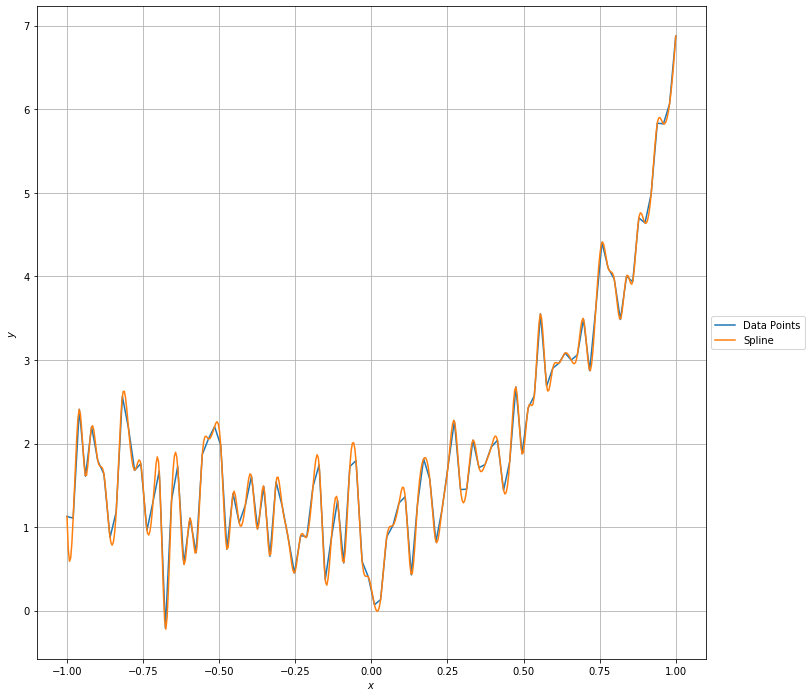

In [12]:
plt.figure(figsize=(12,12))
plt.plot(x,y,markersize=10,label=r'Data Points')
plt.plot(xx,yy,markersize=10,label=r'Spline')
plt.axis('tight')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [13]:
F   = lambda a, b, c, d: sum([((y[i]-a-b*x[i]-c*x[i]**2-d*x[i]**3)**4) for i in range(len(x))])
F_a = lambda a, b, c, d: sum([(-4*(y[i]-a-b*x[i]-c*x[i]**2-d*x[i]**3)**3) for i in range(len(x))])
F_b = lambda a, b, c, d: sum([(-4*x[i]*(y[i]-a-b*x[i]-c*x[i]**2-d*x[i]**3)**3) for i in range(len(x))])
F_c = lambda a, b, c, d: sum([(-4*(x[i]**2)*(y[i]-a-b*x[i]-c*x[i]**2-d*x[i]**3)**3) for i in range(len(x))])
F_d = lambda a, b, c, d: sum([(-4*(x[i]**3)*(y[i]-a-b*x[i]-c*x[i]**2-d*x[i]**3)**3) for i in range(len(x))])
J = np.array([F_a, F_b, F_c, F_d])
F(*[0,0,0,0])

10654.488037908277

In [17]:
def newtonMultivariate(F, Ja, n, tol=1e-10):
    z = np.zeros((n + 1, 4))
    z[0] = np.zeros(4)
    for k in range(n):
        J = np.array([
            [Ja[0](*z[k])],
            [Ja[1](*z[k])],
            [Ja[2](*z[k])],
            [Ja[3](*z[k])]])
        a = z[k][0]
        b = z[k][1]
        c = z[k][2]
        d = z[k][3]
        #discriminante = b**2*c**2-4*a*c**3-4*b**3*d-27*a**2*d**2+18*a*b*c*d
        discriminante = 1
        A = (J@J.T)*discriminante
        b = -J.T*F(*z[k])
        w = conjugate_gradient(A,b) #aqui gradiente
        z[k+1] = z[k] + w[0]
        if np.linalg.norm(F(*z[k+1])) < tol:
            z = z[:k+2]
            break
    return z


newtonMultivariate(F,J,10)

C:\Users\Francis\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Francis\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in multiply
C:\Users\Francis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.
C:\Users\Francis\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\Francis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Francis\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\Francis\Anaconda3\lib\site-packages\ipy

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 6.64149126,  6.64149126,  6.64149126,  6.64149126],
       [ 5.82878679,  5.82878679,  5.82878679,  5.82878679],
       [18.798559  , 18.798559  , 18.798559  , 18.798559  ],
       [ 3.27837696,  3.27837696,  3.27837696,  3.27837696],
       [-5.04619134, -5.04619134, -5.04619134, -5.04619134],
       [22.83749721, 22.83749721, 22.83749721, 22.83749721],
       [        inf,         inf,         inf,         inf],
       [        nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan]])

In [ ]:
A = np.array([
    [],
    [],
    [],
    []
])
b = np.zeros(4)